In [97]:
import pandas as pd

In [103]:
#Read in CSV's

df = pd.DataFrame()

for file in os.listdir('/home/alex/Downloads/Amtrust-8-8-3PM/Words_Merged'):
    new = pd.read_csv(os.path.join('/home/alex/Downloads/Amtrust-8-8-3PM/Words_Merged',file))
    labeled = pd.read_csv(os.path.join('/home/alex/Downloads/Amtrust-8-8-3PM/AMTrustLabeled_CSV',file))
    labeled = labeled[labeled.FieldType != '_Document_Section_1']
    labeled = labeled[labeled.FieldType != '_TableData']
    
    new_c = new[new.Label.notnull()]
    bad_array = []
   
    for item in labeled['FieldType'].unique().tolist():
        if item not in new['Label'].unique().tolist():
            bad_array.extend([item])
         
    try:
        print(file,new['Label'].count(),labeled['FieldType'].count(),bad_array)
    except:
        print('Has issue',file)
    
    df = df.append(new)
df.info()

Batch HF_ID6896__attachment-b608f6c0b608f6c1-gsAqKoqXLgD9pqrKh8v.csv 1048 925 []
Batch HF_ID6847__attachment-85d9939085d99391-gsxP8qPtWPwxKtgHNfx.csv 697 554 []
Batch HF_ID6857__attachment-473a2a90473a2a91-gs3HkrbCe3kBuyWC8tW.csv 110 87 []
Batch HF_ID6839__attachment-47ae76a047ae9db0-gsr7HJmwfuknDsvzynB.csv 34 31 []
Batch HF_ID6892__attachment-ae697800ae697801-gsEBF9i72wrtaWKBK2R.csv 78 74 []
Batch HF_ID6806__attachment-2f35b2c02f35d9d0-gsvqdgdcLGLQW2SSvqB.csv 69 60 []
Batch HF_ID6808__attachment-3c3069603c306961-gsfXQAutcSPK7eCF4GM.csv 318 305 []
Batch HF_ID6801__attachment-0aaf6bd00aaf6bd1-gsREq3PWvNbRevvRNMK.csv 72 75 []
Batch HF_ID6889__attachment-aa183fe0aa183fe1-gszfuErYSXuPxm6xkYW.csv 132 123 []
Batch HF_ID6861__attachment-695cced0695cced1-gsrNPE7iypRKChnCzJw.csv 209 166 []
Batch HF_ID6807__attachment-3b8fa7703b8fa771-gsyA4qqSrpKggPHqH6h.csv 88 71 []
Batch HF_ID6884__attachment-a17a76b0a17a76b1-gsq9WdEqWG757qNMyJe.csv 51 32 []
Batch HF_ID6831__attachment-9ddc1b609ddc1b61-gs8gbzP

In [104]:
df['Label'].count()

16846

In [171]:
df.head()

pageindex  Left  Right  Top  Bottom    N_Left   N_Right     N_Top  \
0          1  1891   2078   67     109  0.573030  0.629697  0.026275   
1          1  1793   1878   68     100  0.543333  0.569091  0.026667   
2          1   242    322   78     148  0.073333  0.097576  0.030588   
3          1   837    881   84     106  0.253636  0.266970  0.032941   
4          1  2955   3088   84     106  0.895455  0.935758  0.032941   

   N_Bottom         X         Y     Width    Height            TableType  \
0  0.042745  0.601364  0.034510  0.056667  0.016471  _Document_Section_1   
1  0.039216  0.556212  0.032941  0.025758  0.012549  _Document_Section_1   
2  0.058039  0.085455  0.044314  0.024242  0.027451  _Document_Section_1   
3  0.041569  0.260303  0.037255  0.013333  0.008627  _Document_Section_1   
4  0.041569  0.915606  0.037255  0.040303  0.008627  _Document_Section_1   

  FieldType    DataText  Value Mismatch Label  
0    _Words     Summary               0   NaN  
1    _Words        Loss               0   NaN  
2    _Words          fk               0   NaN  
3    _Words         905               0   NaN  
4    _Words  04/28/2017               0   NaN

In [105]:
df.groupby('Label').count()

pageindex  Left  Right   Top  Bottom  N_Left  N_Right  \
Label                                                                         
_AccountNumber               71    71     71    71      71      71       71   
_Address1                   686   686    686   686     686     686      686   
_Address2                   374   374    374   374     374     374      374   
_AdjusterName               308   308    308   308     308     308      308   
_AgencyName                 173   173    173   173     173     173      173   
_BodyPart                   302   302    302   302     302     302      302   
_Catalyst                    28    28     28    28      28      28       28   
_Cause                      306   306    306   306     306     306      306   
_ClaimNumber                397   397    397   397     397     397      397   
_ClaimType                  289   289    289   289     289     289      289   
_ClaimantName               511   511    511   511     511     511      511   
_ClassCode                  295   295    295   295     295     295      295   
_CoverageType               382   382    382   382     382     382      382   
_DateReported               274   274    274   274     274     274      274   
_Deductible                  16    16     16    16      16      16       16   
_EffectiveDate              377   377    377   377     377     377      377   
_ExpenseIncurred            382   382    382   382     382     382      382   
_ExpensePaid                385   385    385   385     385     385      385   
_ExpenseRecovered           384   384    384   384     384     384      384   
_ExpenseReserves            387   387    387   387     387     387      387   
_ExpirationDate              95    95     95    95      95      95       95   
_IndemnityIncurred          384   384    384   384     384     384      384   
_IndemnityPaid              389   389    389   389     389     389      389   
_IndemnityRecovered         384   384    384   384     384     384      384   
_IndemnityReserves          387   387    387   387     387     387      387   
_Injury                     304   304    304   304     304     304      304   
_InsuranceCarrier          1327  1327   1327  1327    1327    1327     1327   
_InsuredName                491   491    491   491     491     491      491   
_Location                   497   497    497   497     497     497      497   
_LossDate                   291   291    291   291     291     291      291   
_LossDescription            734   734    734   734     734     734      734   
_LossState                  292   292    292   292     292     292      292   
_LostTimeDays               220   220    220   220     220     220      220   
_MedicalIncurred            385   385    385   385     385     385      385   
_MedicalPaid                386   386    386   386     386     386      386   
_MedicalRecovered           386   386    386   386     386     386      386   
_MedicalReserves            388   388    388   388     388     388      388   
_NoticeDate                 144   144    144   144     144     144      144   
_OpenClaims                  21    21     21    21      21      21       21   
_PolicyNumber               388   388    388   388     388     388      388   
_ProducerCode                17    17     17    17      17      17       17   
_ReceivedDays               229   229    229   229     229     229      229   
_Status                     289   289    289   289     289     289      289   
_TotalIncurred              409   409    409   409     409     409      409   
_TotalNumberOfClaims         21    21     21    21      21      21       21   
_TotalPaid                  409   409    409   409     409     409      409   
_TotalRecovered             407   407    407   407     407     407      407   
_TotalReserves              409   409    409   409     409     409      409   
_UnderwriterName             21    21     21    21      21      21      

In [96]:
len(df.groupby('Label'))

50

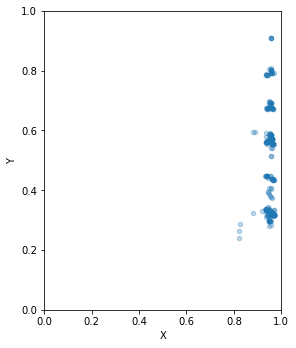

In [202]:
#Plot Position of Labels

%matplotlib inline

df1 = df[df['Label']=='_TotalPaid']
df1 = df1[df1['pageindex']!= 1]
#df1
df1.plot.scatter('X','Y',alpha = 0.3,xlim=(0, 1),ylim=(0, 1),figsize=(4.25,5.5))
#df1.plot.area('X','Y')
#df1.plot.set_ylim(0,1)


#,c='Label')

In [199]:
df.sample(175).head()

pageindex  Left  Right   Top  Bottom    N_Left   N_Right     N_Top  \
676          3   273    390   721     739  0.123978  0.177112  0.423371   
32           1  1283   1327   351     368  0.583182  0.603182  0.206471   
264          3  1075   1317  2408    2436  0.325758  0.399091  0.944314   
240          3  2958   3025  1494    1522  0.896364  0.916667  0.585882   
169          3  1027   1100    99     121  0.465760  0.498866  0.058030   

     N_Bottom         X         Y     Width    Height            TableType  \
676  0.433940  0.150545  0.428655  0.053134  0.010570  _Document_Section_1   
32   0.216471  0.593182  0.211471  0.020000  0.010000  _Document_Section_1   
264  0.955294  0.362424  0.949804  0.073333  0.010980  _Document_Section_1   
240  0.596863  0.906515  0.591373  0.020303  0.010980  _Document_Section_1   
169  0.070926  0.482313  0.064478  0.033107  0.012896  _Document_Section_1   

    FieldType               DataText  Value Mismatch         Label  
676    _Words         Post Ranch, LP               0  _InsuredName  
32     _Words                   Gove               0           NaN  
264    _Words  Statuses, Losses = 0,               0           NaN  
240    _Words                  6,026               0           NaN  
169    _Words                   LOSS               0           NaN

In [35]:
par_df = pd.DataFrame()

for file in os.listdir('/home/alex/Downloads/amtrust-8-7/Paragraphs_Merged'):
    new = pd.read_csv(os.path.join('/home/alex/Downloads/amtrust-8-7/Paragraphs_Merged',file))
    par_df = par_df.append(new)
    #print (file)
par_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26589 entries, 0 to 80
Data columns (total 18 columns):
pageindex         26589 non-null int64
Left              26589 non-null int64
Right             26589 non-null int64
Top               26589 non-null int64
Bottom            26589 non-null int64
N_Left            26589 non-null float64
N_Right           26589 non-null float64
N_Top             26589 non-null float64
N_Bottom          26589 non-null float64
X                 26589 non-null float64
Y                 26589 non-null float64
Width             26589 non-null float64
Height            26589 non-null float64
TableType         26589 non-null object
FieldType         26589 non-null object
DataText          26589 non-null object
Value Mismatch    26589 non-null int64
Label             6383 non-null object
dtypes: float64(8), int64(6), object(4)
memory usage: 3.9+ MB


In [36]:
par_df.head()

pageindex  Left  Right  Top  Bottom    N_Left   N_Right     N_Top  \
0          1  1699   2173   67     238  0.514848  0.658485  0.026275   
1          1    91    495   78     220  0.027576  0.150000  0.030588   
2          1   831    988   84     206  0.251818  0.299394  0.032941   
3          1  2954   3107   84     212  0.895152  0.941515  0.032941   
4          1   630    758   90     212  0.190909  0.229697  0.035294   

   N_Bottom         X         Y     Width    Height            TableType  \
0  0.093333  0.586667  0.059804  0.143636  0.067059  _Document_Section_1   
1  0.086275  0.088788  0.058431  0.122424  0.055686  _Document_Section_1   
2  0.080784  0.275606  0.056863  0.047576  0.047843  _Document_Section_1   
3  0.083137  0.918333  0.058039  0.046364  0.050196  _Document_Section_1   
4  0.083137  0.210303  0.059216  0.038788  0.047843  _Document_Section_1   

    FieldType                                           DataText  \
0  _Paragraph  Loss Summary\nAmTrust North America\nAmerican ...   
1  _Paragraph  fk\nAmTrust North America\nAn AmTrust Financia...   
2  _Paragraph                             905\n5048567\nSHARONPO   
3  _Paragraph                04/28/2017\n11:31:57AM\nPage 1 of 1   
4  _Paragraph                            Report ID\nRun ID\nUser   

   Value Mismatch Label  
0               0   NaN  
1               0   NaN  
2               0   NaN  
3               0   NaN  
4               0   NaN

In [37]:
par_df.groupby('Label').count()

pageindex  Left  Right  \
Label                                                                        
_AccountNumber                                             15    15     15   
_AccountNumber_ClaimNumber_IndemnityReserves_Me...          1     1      1   
_Address1                                                  37    37     37   
_Address1_InsuredName                                      42    42     42   
_Address2                                                  63    63     63   
_Address2_AgencyName                                        7     7      7   
_AdjusterName                                              28    28     28   
_AdjusterName_BodyPart_Cause_ClaimType_Status               1     1      1   
_AdjusterName_BodyPart_ClaimType_Status                     5     5      5   
_AdjusterName_ClaimType                                    24    24     24   
_AdjusterName_ClaimType_Status                            220   220    220   
_AdjusterName_LossDescription                               2     2      2   
_AgencyName_AgencyName_AgencyName_AgencyName_Ef...          1     1      1   
_AgencyName_AgencyName_AgencyName_AgencyName_Ef...          1     1      1   
_AgencyName_AgencyName_AgencyName_EffectiveDate...          2     2      2   
_AgencyName_AgencyName_EffectiveDate_EffectiveDate          1     1      1   
_AgencyName_AgencyName_EffectiveDate_EffectiveD...          1     1      1   
_AgencyName_ClaimantName_EffectiveDate_InsuredName         18    18     18   
_AgencyName_EffectiveDate                                   1     1      1   
_AgencyName_EffectiveDate_InsuredName                       1     1      1   
_BodyPart                                                  38    38     38   
_BodyPart_Catalyst_Cause                                   10    10     10   
_BodyPart_Cause                                            28    28     28   
_BodyPart_Cause_Location_LossDescription                  102   102    102   
_BodyPart_Cause_LossDescription                            77    77     77   
_BodyPart_Cause_LossDescription_LossState                   1     1      1   
_BodyPart_Location                                          1     1      1   
_Catalyst_Cause                                             6     6      6   
_Cause                                                     35    35     35   
_Cause_Injury                                               1     1      1   
...                                                       ...   ...    ...   
_Status                                                     3     3      3   
_TotalIncurred                                            113   113    113   
_TotalIncurred_TotalIncurred                                3     3      3   
_TotalIncurred_TotalIncurred_TotalIncurred                  2     2      2   
_TotalIncurred_TotalIncurred_TotalIncurred_Tota...          2     2      2   
_TotalIncurred_TotalPaid_TotalRecovered                     1     1      1   
_TotalIncurred_TotalPaid_TotalRecovered_TotalRe...        244   244    244   
_TotalIncurred_TotalRecovered                               2     2      2   
_TotalNumberOfClaims                                        1     1      1   
_TotalNumberOfClaims_TotalNumberOfClaims                    3     3      3   
_TotalNumberOfClaims_TotalNumberOfClaims_TotalN...          2     2      2   
_TotalNumberOfClaims_TotalNumberOfClaims_TotalN...          2     2      2   
_TotalPaid                                                  4     4      4   
_TotalPaid_TotalPaid                                        3     3      3   
_TotalPaid_TotalPaid_TotalPaid                              2     2      2   
_TotalPaid_TotalPaid_TotalPaid_TotalPaid                    2     2      2   
_TotalPaid_TotalRecovered                                  50    50     50   
_TotalPaid_TotalRecovered_TotalReserves                    81    81     81   
_TotalPaid_TotalReserves                                    1     1      1